# Achando coordenadas a partir de distâncias

Essa aula foi inteiramente dedicada à debater e melhorar soluções para o problema da aula 4.

### #1: Três pontos em 1D

Tomemos um exemplo simples com os pontos 0, 2 e 4 em uma reta.

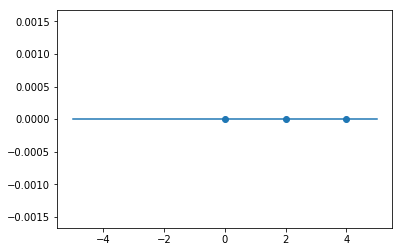

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ans = np.array([0, 2, 4])

plt.plot([-5, 5], [0, 0])
plt.scatter(ans, np.zeros(ans.shape))
plt.show()

Como não sabemos se existe uma solução exata para o problema, uma boa saída é usar uma abordagem de minimização de erro.

O erro nesse caso seria calculado por

$$
    \min \sum_i^3 \sum_{j, j>i}^3 ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Podemos simplificar o problema se fixarmos um dos pontos na origem - por exemplo $\lambda_1$.

$$
    \min (\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2
$$

Onde $\lambda_i$ representa o calor de cada ponto na reta real.

Podemos chamar de $f$ a função que queremos minimizar e em seguida tirar seu gradiente para utilizar na minimização.

$$
    f = (\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2
$$

$$
    \nabla f =
    \begin{bmatrix}
        \frac{\partial}{\partial \lambda_2}((\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2) \\
         \frac{\partial}{\partial \lambda_3}((\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2)
    \end{bmatrix}
$$

$$
    \nabla f =
    \begin{bmatrix}
        4\lambda_2(\lambda_2^2 - d_{12}^2) + 4(\lambda_2 - \lambda_3)((\lambda_2 - \lambda_3)^2 - d_{23}^2) \\
        4\lambda_3(\lambda_3^2 - d_{13}^2) - 4(\lambda_2 - \lambda_3)((\lambda_2 - \lambda_3)^2 - d_{23}^2)
    \end{bmatrix}
$$


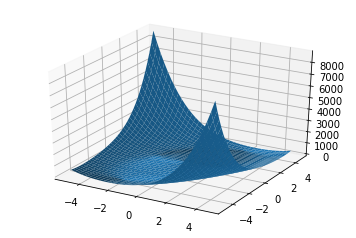

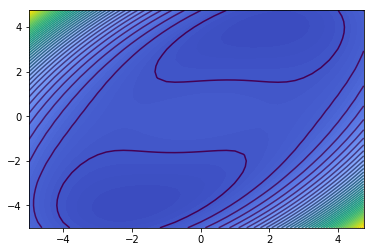

In [15]:
dists = np.array([[0, 2, 4], [2, 0, 2], [4, 2, 0]])

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 - dists[0][1]**2)**2 + (Y**2 - dists[0][2]**2)**2 + ((X - Y)**2 - dists[1][2]**2)**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot da superfície em 3D
ax.plot_surface(X, Y, Z)
plt.show()

#Curvas de nível
error = plt.contourf(X, Y, Z, 200, cmap="coolwarm")
error = plt.contour(X, Y, Z, 50)
# plt.clabel(error, inline=1, fontsize=10)
plt.show()

# #Campo vetorial do gradiente
# f_Dx = 4 * (X * (X**2 - dists[0][1]**2) + (X - Y) * ((X - Y)**2 - dists[1][2]**2))
# f_Dy = 4 * (Y * (Y**2 - dists[0][2]**2) - (X - Y) * ((X - Y)**2 - dists[1][2]**2))
# ax.quiver(X, Y, f_Dx, f_Dy, color="#666666") # ¯\_(ツ)_/¯
# plt.draw()
# plt.show()

A princípcio, olhando para os plots da função e o resultado do gradiente, não é óbvio como encontrar os pontos críticos. Podemos tentar, então uma abordagem de aproximação numérica.

Apenas com o intuito de verificar se conseguimos achar facilmente a resposta desse problema, implementemos o algoritmo de *Gradient Descent*. Esse algoritmo é extremamente simples e consiste apenas em escolher um chute inicial para a solução e seguir o sentido inverso do gradiente da função de erro. Como o gradiente nos mostra a direção de crescimento, ao seguir o caminho contrário, andamos na direção de decrescimento.

Initial guess: [ 0.50178285  0.12371978]
Final answer: [ 2.  4.]


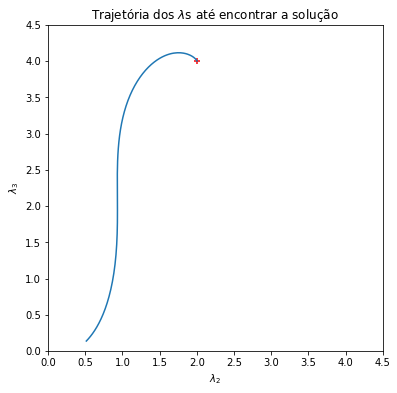

In [6]:
points = np.random.rand(2)
lr = 0.001
decay = 1.0
steps = []
print("Initial guess:", points)
for i in range(300):
#     print(i, points)
    grad = np.array(
        [4 * (points[0] * (points[0]**2 - dists[0][1]**2) + (points[0] - points[1]) * ((points[0] - points[1])**2 - dists[1][2]**2)),
        4 * (points[1] * (points[1]**2 - dists[0][2]**2) + (points[0] - points[1]) * ((points[0] - points[1])**2 - dists[1][2]**2))])
    temp = points - lr * grad
    points = temp
    lr *= decay
    steps.append(temp)
print("Final answer:", points)

#Plot do caminho da solução
steps = np.array(steps)
plt.figure(figsize=(6,6))
plt.plot(steps[:, 0], steps[:, 1])
#Solução ideal
plt.scatter([2],[4], marker="+", c="red")
plt.xlabel("$\lambda_2$")
plt.ylabel("$\lambda_3$")
plt.title("Trajetória dos $\lambda$s até encontrar a solução")
plt.xlim((0,4.5))
plt.ylim((0,4.5))
plt.show()

### #2: Quatro pontos em 1D
Como vemos com o resultado acima, o algoritmo encontrou o resultado exato rapidamente. Tomemos como próximo passo a adição de um quarto ponto no problema.

Agora a função que queremos minimizar passa a ser a seuinte:

$$
    f = (\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + (\lambda_4^2 - d_{14}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2 + ((\lambda_2 - \lambda_4)^2 - d_{24}^2)^2 + ((\lambda_3 - \lambda_4)^2 - d_{34}^2)^2
$$

Na forma expandida, a função fica muito grande, podemos escrevê-la em uma notação mais enxuta (lembre-se que assumimos o primeiro ponto como sendo a origem).

$$
    f = \sum_{i>1}^4 (\lambda_i^2 - d_{1i}^2)^2 + \sum_{i>1}^4 \sum_{j > i}^4 ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Para simplificar, podemos o escrever a seguinte função que minimiza o mesmo problema:

$$
    f = \sum_{i>1}^4 (\lambda_i^2 - d_{1i}^2)^2 + \sum_{i>1}^4 \sum_{j>1}^4 ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Agora tomemos o gradiente dessa função:

$$
    \nabla f = 
    \begin{bmatrix}
        4\lambda_2(\lambda_2^2 - d_{12}^2) + \sum_{i>1}^4 8(\lambda_2 - \lambda_i)((\lambda_2 - \lambda_i)^2 - d_{2i}^2)\\
        4\lambda_3(\lambda_3^2 - d_{13}^2) + \sum_{i>1}^4 8(\lambda_3 - \lambda_i)((\lambda_3 - \lambda_i)^2 - d_{3i}^2)\\
        4\lambda_4(\lambda_4^2 - d_{14}^2) + \sum_{i>1}^4 8(\lambda_4 - \lambda_i)((\lambda_4 - \lambda_i)^2 - d_{4i}^2)
    \end{bmatrix}
$$

Usando o mesmo algoritmo acima, podemos encontrar os pontos que melhor se adequam às distâncias propostas.

Initial guess: [ 0.05586744  0.21812201  0.36350693]
Final answer: [ 2.  4.  5.]


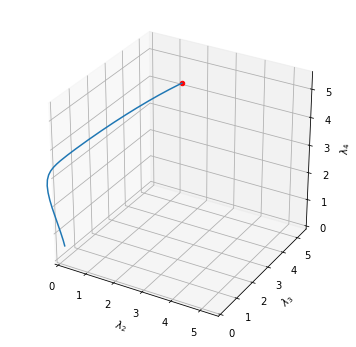

In [106]:
#pontos: 0, 2, 4, 5
pts4 = [0, 2, 4, 5]
dists4pts = np.array([pts4]*len(pts4))
dists4pts = dists4pts - dists4pts.T

guess4 = np.random.rand(len(pts4)-1)
lr = 0.001
decay = 1.0
steps = []
print("Initial guess:", guess4)

for _ in range(300):
    grad = np.zeros(guess4.shape)
    for i in range(guess4.shape[0]):
        grad[i] = 4 * guess4[i] * (guess4[i]**2 - dists4pts[0][i+1]**2)
        for j in range(guess4.shape[0]):
            grad[i] += 8 * (guess4[i] - guess4[j]) * ((guess4[i] - guess4[j])**2 - dists4pts[i+1][j+1]**2)
    temp = guess4 - lr * grad
    lr *= decay
    steps.append(temp)
    guess4 = temp
    
print("Final answer:", guess4)

steps = np.array(steps)

#Plot do caminho da solução
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.plot(steps[:, 0], steps[:, 1], steps[:, 2])
#Solução ideal
ax.scatter([2],[4],[5], c="red")
plt.xlabel("$\lambda_2$")
plt.ylabel("$\lambda_3$")
ax.set_zlabel("$\lambda_4$")
ax.set_xlim(0,5.5)
ax.set_ylim(0,5.5)
ax.set_zlim(0,5.5)
plt.show()

### #3: N pontos em 1D
Como podemos ver pelo código acima, o algoritmo novamente funcionou perfeitamente para o problema. Podemos agora tentar generalizá-lo para uma quantidade arbitrária de pontos.

Comecemos por definir a função $f$ com base em N pontos.

$$
    f = \sum_{i>1}^N (\lambda_i^2 - d_{1i}^2)^2 + \sum_{i>1}^N \sum_{j > 1}^N ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Repare que $f$ não mudou muito em relação ao exercício com quatro pontos usando a notação de somatório.

Procedemos agora a encontrar o grandiente de $f$, que também será similar ao anterior.

$$
    \nabla f = 
    \begin{bmatrix}
        4\lambda_2(\lambda_2^2 - d_{12}^2) + \sum_{i>1}^N 8(\lambda_2 - \lambda_i)((\lambda_2 - \lambda_i)^2 - d_{2i}^2)\\
        4\lambda_3(\lambda_3^2 - d_{13}^2) + \sum_{i>1}^N 8(\lambda_3 - \lambda_i)((\lambda_3 - \lambda_i)^2 - d_{3i}^2)\\
        \vdots \\
        4\lambda_N(\lambda_N^2 - d_{1N}^2) + \sum_{i>1}^N 8(\lambda_N - \lambda_i)((\lambda_N - \lambda_i)^2 - d_{Ni}^2)
    \end{bmatrix}
$$

Com isso, podemos finalmente escrever o algoritmo geral para N pontos.

In [145]:
npts = [0, 2, 4, 5, 7, 11, 18]
gg = [0,2,4, 5, 7, 11]

def calc_grad(p, d):
    grad = 4 * p * (p**2 - d[0][1:]**2)
    for i in range(p.shape[0]):
        grad += 8 * (p - p[i]) * ((p - p[i])**2 - d[1:, i+1]**2)
    return grad

def calc_grad2(p, d):
    grad = np.zeros(p.shape)
    for i in range(p.shape[0]):
        grad[i] = 4 * p[i] * (p[i]**2 - d[0][i+1]**2)
        for j in range(p.shape[0]):
            grad[i] += 8 * (p[i] - p[j]) * ((p[i] - p[j])**2 - d[i+1][j+1]**2)
    return grad

def grad_desc(p, lr=0.001, decay=1.0, iter=300):
    distNpts = np.array([p]*len(p))
    distNpts = distNpts - distNpts.T
    
    guess = np.random.rand(len(p) - 1)
    
    for _ in range(iter):
        print(_, guess)
        g = calc_grad2(guess, distNpts)
        guess -= lr * g
        lr *= decay
    
    return guess

print(grad_desc(gg,decay=0.95 , iter=500))

0 [ 0.60543558  0.76717478  0.02389063  0.48846077  0.49156739]
1 [ 0.74654782  0.95003561 -0.16461602  0.55412301  0.6816357 ]
2 [ 0.88323112  1.13502148 -0.48071464  0.59707689  1.0965037 ]
3 [ 0.88347592  1.23112757 -0.97892849  0.58190485  2.12015504]
4 [ 0.33206416  0.98687629 -1.64924466  0.46218506  4.64027658]
5 [-1.38746466  0.12932888 -1.58016152  0.56034981  8.5601407 ]
6 [-0.55170378  1.26007755  2.52185732  3.29311489  0.99514784]
7 [-1.50334662  1.34355959  2.93445257  4.11207928  1.53799114]
8 [-2.19439187  1.27131566  3.0385031   4.44838844  2.91950905]
9 [-2.34606492  0.80597419  2.64284414  4.22638023  5.55084142]
10 [-1.98227403  0.1777268   1.92544541  3.82535949  8.68765703]
11 [ 0.06321518  1.2246505   2.2005943   4.00371067  6.50845183]
12 [-1.32043975  0.75583627  1.99677364  4.38532911  9.78986311]
13 [ 0.92928715  2.1202862   2.9066326   4.70665034  5.86849054]
14 [-0.43332415  1.61922757  2.71118469  5.09285112  8.99880465]
15 [-0.0114344   1.85929344  2.8950

É interessante de se notar que quanto mais pontos acrescentamos, mais temos que mexer com os hiperparâmetros do algoritmo.

### #4: 3 pontos em 2D

Examinemos, agora, o problema em uma dimensão a mais. Queremos encontrar as coordenadas para três pontos em um plano 2D dadas as distâncias entre si.

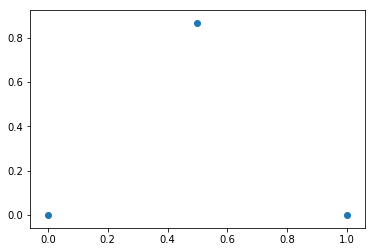

In [156]:
target = np.array([[0,0], [1,0], [0.5, np.sqrt(3) / 2]])

plt.scatter(target[:, 0], target[:, 1])
plt.show()

Para aproximá-los, usemos novamente o *Gradient Descent*. Para isso precisamos calcular primeiro a função de erro.

$$
    \newcommand{\norm}[1]{\left\lVert#1\right\rVert}
    f = \sum_i^3 \sum_j^3 (\norm{p_i - p_j}^2 - d_{ij}^2)^2
$$

Podemos simplificar o problema novamente, escolhendo um ponto para ser a origem - nesse caso $p_1$.

$$
    f = (\norm{p_2}^2 - d_{12}^2)^2 + (\norm{p_3}^2 - d_{13}^2)^2 + (\norm{p_2 - p_3}^2 - d_{23}^2)^2
$$

$$
    f = ({p_2}^Tp_2 - d_{12}^2)^2 + ({p_3}^Tp_3 - d_{13}^2)^2 + ({(p_2 - p_3)}^T(p_2 - p_3) - d_{23}^2)^2
$$

Se tirarmos o gradiente de $f$ obtemos o seguinte:

$$
    \nabla f =
    \begin{bmatrix}
        4({p_2}^Tp_2 - d_{12}^2)p_2 + 4({(p_2 - p_3)}^T(p_2 - p_3) - d_{23}^2)(p_2 - p_3)) \\
        4({p_3}^Tp_3 - d_{13}^2)p_3 - 4({(p_2 - p_3)}^T(p_2 - p_3) - d_{23}^2)(p_2 - p_3))
    \end{bmatrix}
$$

Com isso, temos tudo que é necessário para resolver o problema.

Initial guess: [[ 0.27668841  0.0093748 ]
 [ 0.75683495  0.74997021]]
Final answer: [[ 0.95595096 -0.27188477]
 [ 0.70867599  0.70060454]]


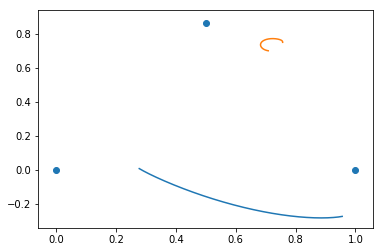

In [166]:
guess2D = np.random.rand(2, 2)
dist2D = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])

lr = 0.001
decay = 1.0
steps = []
print("Initial guess:", guess2D)
for i in range(1000):
    diff = (guess2D[0] - guess2D[1])
    grad = np.array([
        4 * ((guess2D[0].T.dot(guess2D[0]) - dist2D[0][1]**2) * guess2D[0] + (diff.T.dot(diff) - dist2D[1][2]**2) * diff),
        4 * ((guess2D[1].T.dot(guess2D[1]) - dist2D[0][2]**2) * guess2D[1] - (diff.T.dot(diff) - dist2D[1][2]**2) * diff)
    ])
    temp = guess2D - lr * grad
    lr *= decay
    steps.append(temp)
    guess2D = temp
print("Final answer:", guess2D)
steps = np.array(steps)
plt.scatter(target[:,0], target[:,1])
plt.plot(steps[:,0,0], steps[:,0,1])
plt.plot(steps[:,1,0], steps[:,1,1])
plt.show()

[[ 0.57934322  0.34409959]
 [ 0.21555569  0.407771  ]
 [ 0.40087982  0.162966  ]
 [ 0.81462188  0.43958215]
 [ 0.61705988  0.16819333]
 [ 0.16871861  0.60257205]
 [ 0.08433935  0.58412003]
 [ 0.93664631  0.25407536]
 [ 0.97527288  0.54273083]]
1.97641141147e+15
8.29080635587e+19
3.28032192882e+48
2.32462075549e+134
inf
inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in subtract



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

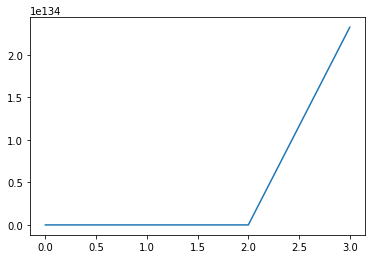

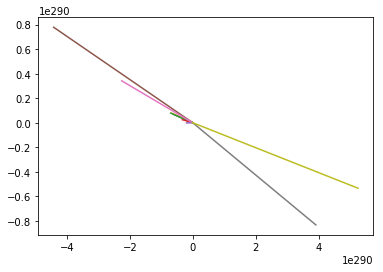

In [180]:
with open("cities.csv", "r") as f:
    data = [[int(x) for x in d.split(", ")] for d in f.read().split("\n")[1:]]

distances = np.array(data)

cities = np.random.rand(distances.shape[0], 2)
print(cities)
lr = 0.001
decay = 1.0

norm2 = lambda x: x.T.dot(x)
steps = []
errors = []
for i in range(1000):
    error = 0
    for i, p1 in enumerate(cities):
        for j, p2 in enumerate(cities):
            diff = p1 - p2
            error += (norm2(diff) - distances[i][j]**2)**2
    print(error)
    errors.append(error)
    grad = np.zeros(cities.shape)
    for i, p in enumerate(cities):
        for j, q in enumerate(cities):
            diff = p - q
            grad[i] += (norm2(diff) - distances[i][j]**2) * diff
    temp = cities - lr * grad
    steps.append(temp)
    cities = temp

print(cities)
steps = np.array(steps)
plt.plot(errors)
plt.show()
plt.scatter(cities[:, 0], cities[:, 1])
for i in range(cities.shape[0]):
    plt.plot(steps[:, i, 0], steps[:, i, 1])
plt.show()